# Derrick's notebook: Firearms Seized in Pittsburgh Metropolitain Area 

The **metric** used in this notebook is amount of firearms siezed by Pittsburgh Bureau of Police. The desired outcome from using this dataset and metric is to obtain the neighborhood with the least amount of guns seized from 2015 - 2021

In [2]:
#### import csv
import pandas as pd
import geopandas
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# load data from a downloaded data set
pol = pd.read_csv("https://data.wprdc.org/datastore/dump/e967381d-d7e9-48e3-a2a2-39262f7fa5c4")
pol.dropna()

nfs = pol.groupby('neighborhood')['total_count'].sum().sort_values()
print("Total Number of Firearms Seized in Pittsburgh Metropolitain Area from 2015 to 2021")
print(nfs)

Total Number of Firearms Seized in Pittsburgh Metropolitain Area from 2015 to 2021
neighborhood
Swisshelm Park        3
Summer Hill           3
Regent Square         3
Mt. Oliver            3
Oakwood               3
                   ... 
Carrick             133
East Liberty        140
Homewood North      146
South Side Flats    174
Homewood South      300
Name: total_count, Length: 88, dtype: int64


neighborhood
Swisshelm Park           3
Summer Hill              3
Regent Square            3
Mt. Oliver               3
Oakwood                  3
West End                 4
Chartiers City           4
Friendship               5
Lincoln Place            6
St. Clair                7
Fairywood                7
Mount Oliver Borough     8
Banksville               8
Hays                     8
Esplen                   9
Westwood                 9
Polish Hill              9
Arlington Heights       10
Spring Garden           10
Bon Air                 11
Stanton Heights         11
South Shore             11
Windgap                 12
West Oakland            13
Allegheny Center        13
Glen Hazel              14
Upper Lawrenceville     14
Squirrel Hill North     14
Lower Lawrenceville     15
Allegheny West          17
North Shore             17
Duquesne Heights        17
Point Breeze North      18
Central Oakland         18
North Oakland           19
Name: total_count, dtype: int64


Text(0, 0.5, 'Number of Firearms Seized')

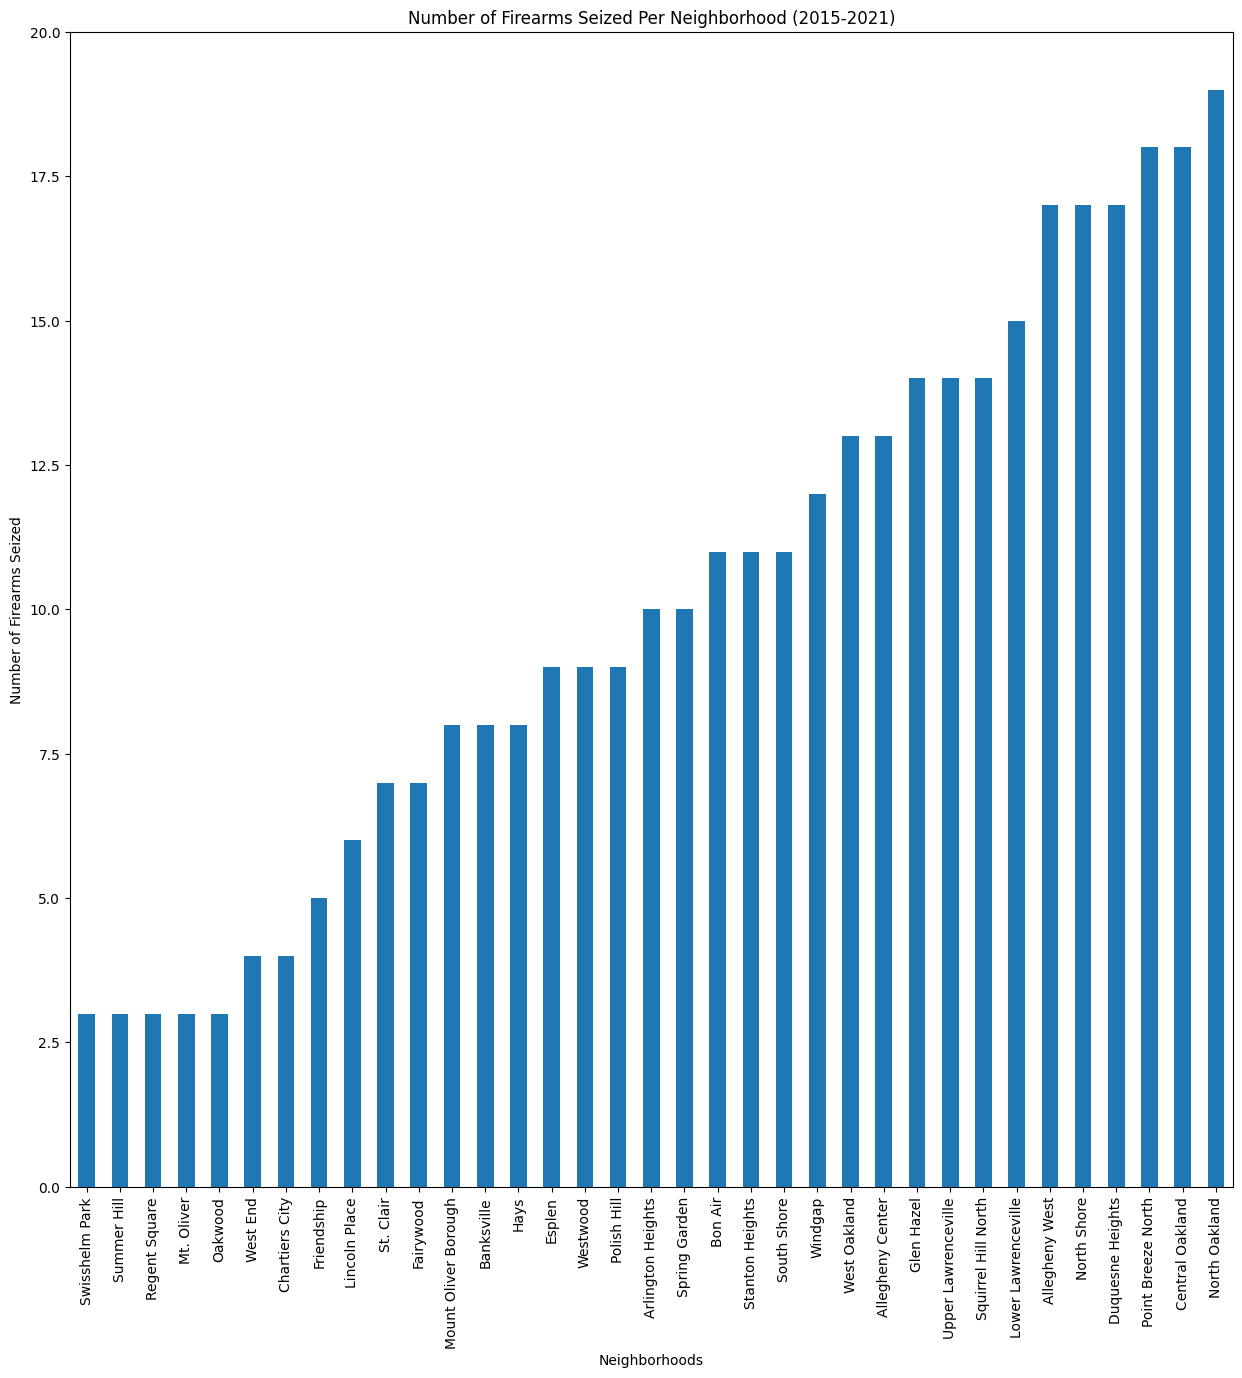

In [5]:
snfs = nfs.head(35)
print(snfs)

#Bar Graph
plt.style.use('default')
snfs.plot.bar(figsize=(15,15), ylim=[0,20])
plt.title("Number of Firearms Seized Per Neighborhood (2015-2021)")
plt.xlabel("Neighborhoods")
plt.ylabel("Number of Firearms Seized")

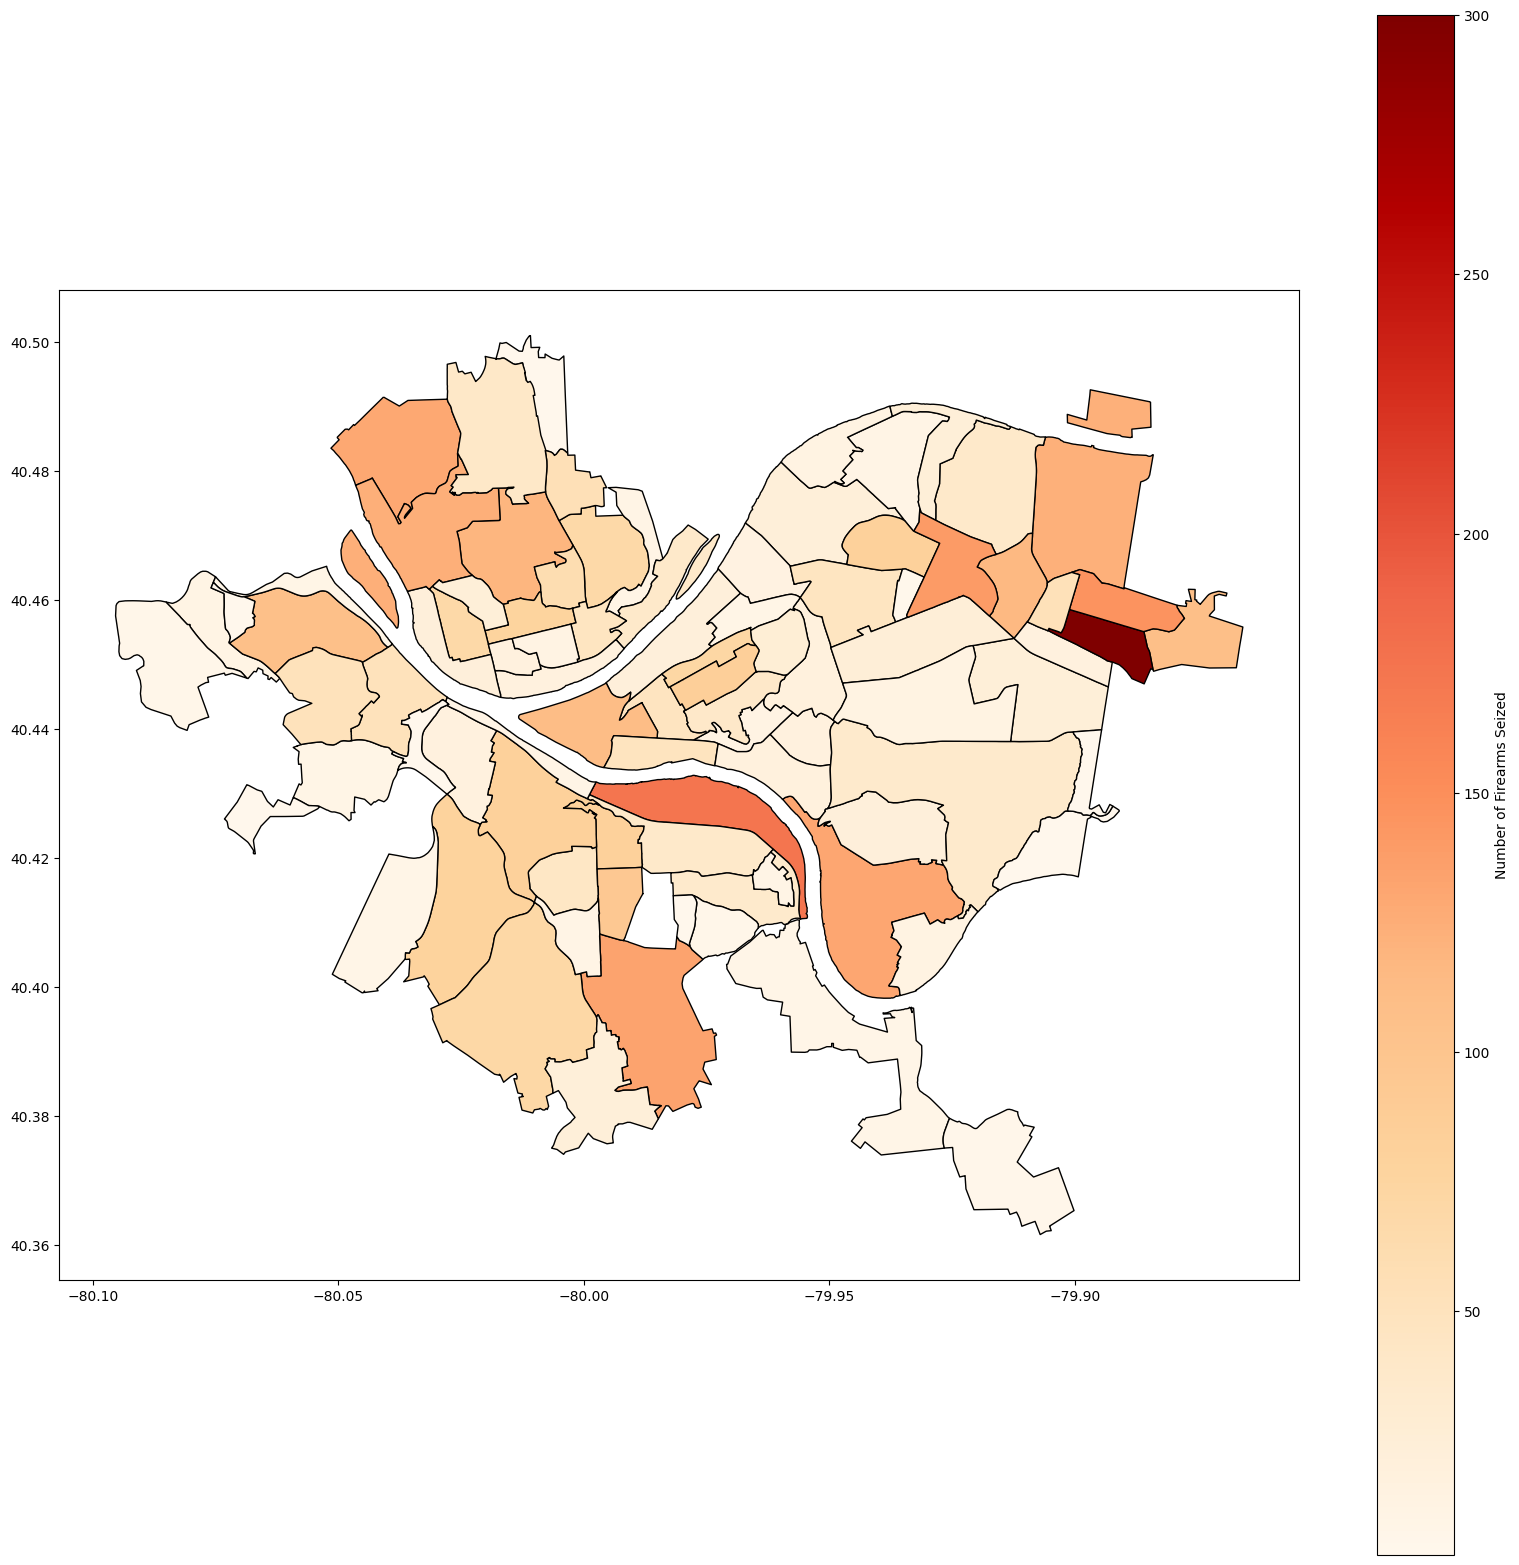

In [6]:
#Heat Map
count = 1
pol["number_of_firearms_seized"] = count
num_guns = pol.groupby("neighborhood").sum()['total_count']
num_guns.sort_values(ascending=False)
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
gun_map = neighborhoods.merge(num_guns, how='left', left_on='hood',right_on='neighborhood')
gun_map.plot(column='total_count', cmap='OrRd', edgecolor="black", legend=True, legend_kwds = {'label': "Number of Firearms Seized"}, figsize=(20,20))

# Data Limitations
The main data limitation for this dataset is that the reason for seizing the firearm is not listed. The source (https://data.wprdc.org/dataset/pbp-fire-arm-seizures) that goes into more detail about the dataset says there are a number of reasons that a gun could've been seized, from locating a gun on the street to aprehending a gun from a criminal. Because of this, it is difficult to determine if each incidence is because of criminal intention, thus making it difficult to fully determine if each neigborhood has a higher gun crime rate or not. 


# Data Analysis
Discussing with my partners for the venture, we decided to choose "the best neighborhood" in Pittsburgh Metropolitain Area by using the combined metric of the safest neighborhood. I belive that one thing that future homeowners value when choosing a home is safety, because of this I started measuring the firearms seized by Pittsburgh Police to find the least amount in a neighborhood overall. The top five least amount of firerams seized from 2015-2021 in order: Swisshelm Park, Summer Hill, Regent Square, Mt. Oliver, and Oakwood. The neighborhood with the most firearms seized was Homewood South, leading with 300 firerams seized, with the second neighborhood being SouthSide Flats, with 174. With taking into account of the other datasets, fires and arrests in Pittsburgh, Mount Oliver appears to be the safest neighborhood.